In [1]:
import pandas as pd

df = pd.read_csv("data/raw/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.shape

(1460, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Condition2      0.000000
dtype: float64

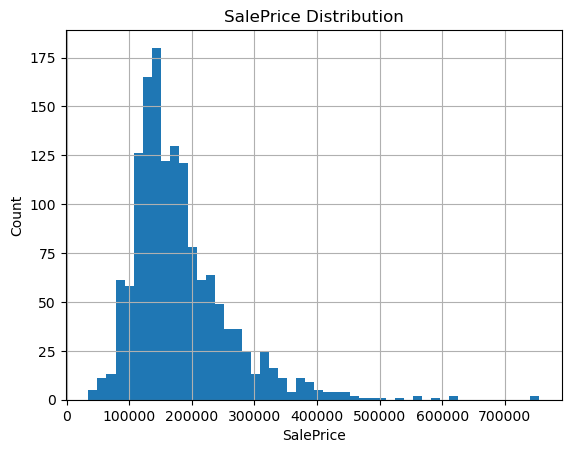

In [5]:
import matplotlib.pyplot as plt

df['SalePrice'].hist(bins=50)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.title("SalePrice Distribution")
plt.show()

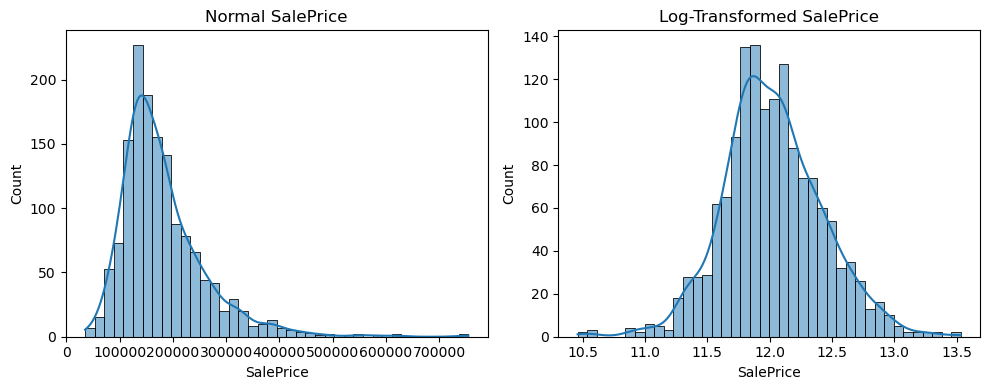

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['SalePrice'], kde=True, bins=40)
plt.title("Normal SalePrice")

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['SalePrice']), kde=True, bins=40)
plt.title("Log-Transformed SalePrice")

plt.tight_layout()
plt.show()

In [7]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])

In [8]:
df[['SalePrice', 'SalePrice_log']].head()

,SalePrice,SalePrice_log
0,208500,12.247699
1,181500,12.109016
2,223500,12.317171
3,140000,11.849405
4,250000,12.429220


In [9]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("None")

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [15]:
df_encoded.shape
df_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [16]:
# Target ve Feature ayrımı
X = df_encoded.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = df_encoded['SalePrice_log']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(0.17305314148553053)

In [19]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_ridge

np.float64(0.13797172925942305)

In [23]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=50)
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_ridge

np.float64(0.1395754863398346)

In [24]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.001)
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_lasso

np.float64(0.14176495408111683)

In [26]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf

np.float64(0.14932036082577238)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_gb

np.float64(0.1361718346270284)

In [31]:
# Tahminleri log ölçeğinden geri çevir 
test_predictions = np.expm1(y_pred_gb)  
test_predictions[:10]

array([140572.58717758, 339761.14060643, 113706.64472276, 151471.90394202,
       329011.20462041,  79879.66197063, 237824.60509635, 143900.48498658,
        76906.80480045, 137142.55240158])

In [32]:
test_df = pd.read_csv("data/raw/test.csv")

In [33]:
test_cat_cols = test_df.select_dtypes(include=['object']).columns
test_df[test_cat_cols] = test_df[test_cat_cols].fillna("None")

test_num_cols = test_df.select_dtypes(include=['int64', 'float64']).columns
test_df[test_num_cols] = test_df[test_num_cols].fillna(0)

In [34]:
test_encoded = pd.get_dummies(test_df, drop_first=True)

In [35]:
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)

In [36]:
test_pred_log = model_gb.predict(test_encoded)

In [37]:
test_predictions = np.expm1(test_pred_log)

In [38]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_predictions
})

submission.to_csv("submission.csv", index=False)
submission.head()

,Id,SalePrice
0,1461,125528.763725
1,1462,152918.486397
2,1463,172524.934438
3,1464,189060.455911
4,1465,184511.365902


In [41]:
len(test_df)

1459

In [42]:
len(test_predictions)

1459

In [43]:
submission.isnull().sum()

Id           0
SalePrice    0
dtype: int64